In [1]:
from ipynb.fs.full.MongoDB_Connections import _connect_mongo

from ipynb.fs.full.MongoDB_Funciones_Consultas import _resumen_mensual_por_anio
from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio
from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes
from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_por_estacion
from ipynb.fs.full.MongoDB_Funciones_Consultas import _data_anio_mes_por_estacion

from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_full
from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio
from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_meteo_por_anio_mes

from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations
from ipynb.fs.full.MongoDB_Funciones_Consultas import _consulta_stations_EstacionesMeteo

import time
import pandas as pd
pd.options.display.float_format = '{:,}'.format

## Conexión a Mongo

In [2]:
db_Tracks = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Tracks')
db_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Meteo_NivelHora')
db_Stations = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_Master')
db_Stations_Meteo = _connect_mongo('cloud', 'cluster0.15npsxw.mongodb.net', None, 'ucmtfm2022', 'UCM_2022', 'BiciMAD', 'Station_EstacionMeteo')

Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard-00-01.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-02.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-00.15npsxw.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-xyv6ql-shard-0', tls=True, serverselectiontimeoutms=4000), 'BiciMAD'), 'Tracks')
Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard-00-01.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-02.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-00.15npsxw.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-xyv6ql-shard-0', tls=True, serverselectiontimeoutms=4000), 'BiciMAD'), 'Meteo_NivelHora')
Conexion OK
Collection(Database(MongoClient(host=['ac-x1d17w2-shard-00-01.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-02.15npsxw.mongodb.net:27017', 'ac-x1d17w2-shard-00-00.15npsxw.mongodb.net:27017'], document_class=dict, tz_aware=

## Descarga datos 2019

In [59]:
# # Tracks
# t_ini = time.time()
# data_Tracks_2017 = _data_anio(db_Tracks, 2017)
# data_Tracks_2018 = _data_anio(db_Tracks, 2018)
# data_Tracks_2019 = _data_anio(db_Tracks, 2019)
# data_Tracks_2020 = _data_anio(db_Tracks, 2020)
# data_Tracks_2021 = _data_anio(db_Tracks, 2021)
# t_end = time.time()

# print ((t_end - t_ini)/60)

# data_Tracks = pd.concat([
#     data_Tracks_2017,
#     data_Tracks_2018,
#     data_Tracks_2019,
#     data_Tracks_2020,
#     data_Tracks_2021
# ])

# data_Tracks.shape

0.2542961041132609


In [ ]:
# data_Tracks.to_csv('C:\Master BigData\TFM\Data\DataFullTracks_MongoDB.csv')

In [82]:
t_ini = time.time()
data_Tracks = pd.read_csv('C:\Master BigData\TFM\Data\DataFullTracks_MongoDB.csv')
t_end = time.time()
print ((t_end - t_ini)/60)

0.30170076290766396


In [ ]:
# t_ini = time.time()
# data_Tracks_2017 = _data_anio_por_estacion(db_Tracks, 2017, 175)
# data_Tracks_2018 = _data_anio_por_estacion(db_Tracks, 2018, 175)
# data_Tracks_2019 = _data_anio_por_estacion(db_Tracks, 2019, 175)
# data_Tracks_2020 = _data_anio_por_estacion(db_Tracks, 2020, 175)
# data_Tracks_2021 = _data_anio_por_estacion(db_Tracks, 2021, 175)
# t_end = time.time()

# data_Tracks = pd.concat([
#     data_Tracks_2017,
#     data_Tracks_2018,
#     data_Tracks_2019,
#     data_Tracks_2020,
#     data_Tracks_2021
# ])

# print ((t_end - t_ini)/60)

In [27]:
data_Tracks = _data_anio(db_Tracks, 2019)

In [85]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908334 entries, 0 to 13908333
Data columns (total 15 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Unnamed: 0        int64 
 1   ANIO              int64 
 2   MES               int64 
 3   DIA               int64 
 4   HORA              int64 
 5   DIA_SEMANA        int64 
 6   AM_PM             object
 7   TEMPORADA         object
 8   UNPLUG_TIME_date  object
 9   travel_time       int64 
 10  idunplug_station  int64 
 11  idplug_station    int64 
 12  user_type         int64 
 13  ageRange          int64 
 14  zip_code          object
dtypes: int64(11), object(4)
memory usage: 1.6+ GB


In [84]:
# Meteorologia
t_ini = time.time()
#data_Meteo = _consulta_meteo_por_anio(db_Meteo, 2019)
data_Meteo = _consulta_meteo_full(db_Meteo)
t_end = time.time()

print (t_end - t_ini)
data_Meteo


11.806480169296265


,ANIO,MES,DIA,HORA,Id_EstacionMeteo,PROVINCIA,MUNICIPIO,TEMPERATURA,VIENTO,PRESION,RADIACION,PRECIPITACION
0,2019,12,1,1,28079102,28,79,4.3,175,938,2,0.0
1,2019,12,2,1,28079102,28,79,4.5,59,937,1,0.2
2,2019,12,3,1,28079102,28,79,2.1,65,940,0,0.0
3,2019,12,4,1,28079102,28,79,2.7,54,938,1,0.0
4,2019,12,5,1,28079102,28,79,6.0,54,936,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
575971,2017,1,29,24,28079059,28,79,10.4,221,939,1,0.0
575972,2017,1,30,24,28079059,28,79,9.6,239,946,1,0.0
575973,2017,1,31,24,28079059,28,79,11.4,226,946,1,0.0
575974,2017,3,5,24,28079102,28,79,6.3,262,939,0,0.0


In [86]:
# Stations
t_ini = time.time()
data_Stations = _consulta_stations(db_Stations)
t_end = time.time()

print (t_end - t_ini)
data_Stations


0.30998659133911133


,Id_Station,Nro_Station,Gis_X,Gis_Y,Fecha_Alta,Distrito,Barrio,Calle,Finca,Tipo_Reserva,Plazas,Longitud,Latitud,Direccion
0,1,001 a,"440443,61","4474290,65",43803,01 �CENTRO,01-06 SOL,"ALCALA, CALLE, DE",2,BiciMAD,30,-3.701998,40.4171107,"ALCALA, CALLE, DE, 2"
1,2,001 b,"440480,56","4474301,74",43867,01 �CENTRO,01-06 SOL,"ALCALA, CALLE, DE",6,BiciMAD,30,-3.7015636,40.4172132,"ALCALA, CALLE, DE, 6"
2,3,2,"440134,83","4474678,23",41813,01 �CENTRO,01-05 UNIVERSIDAD,"MIGUEL MOYA, CALLE, DE",1,BiciMAD,24,-3.7056739,40.42058,"MIGUEL MOYA, CALLE, DE, 1"
3,4,3,"440012,98","4475760,68",41813,07 �CHAMBERi,07-02 ARAPILES,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL",2,BiciMAD,18,-3.7072122,40.4303224,"CONDE DEL VALLE DE SUCHIL, PLAZA, DEL, 2"
4,5,4,"440396,4","4475565,36",41813,01 �CENTRO,01-05 UNIVERSIDAD,"MANUELA MALASA�A, CALLE, DE",3,BiciMAD,24,-3.7026739,40.4285905,"MANUELA MALASA�A, CALLE, DE, 3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,265,257,"438063,25","4476718,06",44194,09 �MONCLOA-ARAVACA,09-03 CIUDAD UNIVERSITARIA,"JUAN DE HERRERA, AVENIDA, DE",1,BiciMAD,24,-3.73029,40.438804,"JUAN DE HERRERA, AVENIDA, DE, 1"
260,266,258,"438326,14","4477849,84",44194,09 �MONCLOA-ARAVACA,09-03 CIUDAD UNIVERSITARIA,"COMPLUTENSE, AVENIDA",frente al 14,BiciMAD,24,-3.7273004,40.449019,"COMPLUTENSE, AVENIDA, frente al 14"
261,267,259,"438344,78","4477338,89",44194,09 �MONCLOA-ARAVACA,09-03 CIUDAD UNIVERSITARIA,"RAMON Y CAJAL, PLAZA, DE",S/N,BiciMAD,24,-3.727031,40.4444176,"RAMON Y CAJAL, PLAZA, DE, S/N"
262,268,260,"438328,53","4477762,41",44194,09 �MONCLOA-ARAVACA,09-03 CIUDAD UNIVERSITARIA,"JOSE ANTONIO NOVAIS, CALLE, DE",S/N,BiciMAD,24,-3.7272637,40.4482316,"JOSE ANTONIO NOVAIS, CALLE, DE, S/N"


In [87]:
# Stations
t_ini = time.time()
data_StationsMeteo = _consulta_stations_EstacionesMeteo(db_Stations_Meteo)
t_end = time.time()

print (t_end - t_ini)
data_StationsMeteo


0.2322700023651123


,Id_Station,Id_EstacionMeteo,Nro_Station,Nom_EstacionMeteo
0,1,28079035,001 a,Plaza del Carmen
1,2,28079035,001 b,Plaza del Carmen
2,3,28079035,2,Plaza del Carmen
3,4,28079004,3,Plaza Espa�a
4,5,28079109,4,J.M.D.Chamberi
...,...,...,...,...
259,265,28079106,257,Centro Mpal. De Acustica
260,266,28079106,258,Centro Mpal. De Acustica
261,267,28079106,259,Centro Mpal. De Acustica
262,268,28079106,260,Centro Mpal. De Acustica


In [79]:
data_Tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13908334 entries, 0 to 13908333
Data columns (total 17 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ANIO                  int64  
 2   MES                   int64  
 3   DIA                   int64  
 4   HORA                  int64  
 5   DIA_SEMANA            int64  
 6   AM_PM                 object 
 7   TEMPORADA             object 
 8   UNPLUG_TIME_date      object 
 9   travel_time           int64  
 10  idunplug_station      int64  
 11  idplug_station        int64  
 12  user_type             int64  
 13  ageRange              int64  
 14  zip_code              object 
 15  travel_time_mins      float64
 16  travel_time_mins_log  float64
dtypes: float64(2), int64(11), object(4)
memory usage: 1.8+ GB


In [88]:
data_Meteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575976 entries, 0 to 575975
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ANIO              575976 non-null  int64  
 1   MES               575976 non-null  int64  
 2   DIA               575976 non-null  int64  
 3   HORA              575976 non-null  int64  
 4   Id_EstacionMeteo  575976 non-null  int64  
 5   PROVINCIA         575976 non-null  int64  
 6   MUNICIPIO         575976 non-null  int64  
 7   TEMPERATURA       575976 non-null  float64
 8   VIENTO            575976 non-null  int64  
 9   PRESION           575976 non-null  int64  
 10  RADIACION         575976 non-null  int64  
 11  PRECIPITACION     575976 non-null  float64
dtypes: float64(2), int64(10)
memory usage: 52.7 MB


In [89]:
data_Stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id_Station    264 non-null    int64  
 1   Nro_Station   264 non-null    object 
 2   Gis_X         264 non-null    object 
 3   Gis_Y         264 non-null    object 
 4   Fecha_Alta    264 non-null    int64  
 5   Distrito      264 non-null    object 
 6   Barrio        264 non-null    object 
 7   Calle         264 non-null    object 
 8   Finca         264 non-null    object 
 9   Tipo_Reserva  264 non-null    object 
 10  Plazas        264 non-null    int64  
 11  Longitud      264 non-null    float64
 12  Latitud       264 non-null    float64
 13  Direccion     264 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 29.0+ KB


In [90]:
data_StationsMeteo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id_Station         264 non-null    int64 
 1   Id_EstacionMeteo   264 non-null    int64 
 2   Nro_Station        264 non-null    object
 3   Nom_EstacionMeteo  264 non-null    object
dtypes: int64(2), object(2)
memory usage: 8.4+ KB


In [91]:
data = pd.merge(data_Tracks, data_Stations, how='left', left_on='idunplug_station', right_on='Id_Station')

In [93]:
data1 = pd.merge(data, data_StationsMeteo, how='left', left_on='Id_Station', right_on='Id_Station')

In [96]:
data_final = pd.merge(data1, data_Meteo, how='left', left_on=['Id_EstacionMeteo','ANIO','MES','DIA','HORA'], right_on=['Id_EstacionMeteo','ANIO','MES','DIA','HORA'])

In [97]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13908334 entries, 0 to 13908333
Data columns (total 39 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   ANIO               int64  
 2   MES                int64  
 3   DIA                int64  
 4   HORA               int64  
 5   DIA_SEMANA         int64  
 6   AM_PM              object 
 7   TEMPORADA          object 
 8   UNPLUG_TIME_date   object 
 9   travel_time        int64  
 10  idunplug_station   int64  
 11  idplug_station     int64  
 12  user_type          int64  
 13  ageRange           int64  
 14  zip_code           object 
 15  Id_Station         int64  
 16  Nro_Station_x      object 
 17  Gis_X              object 
 18  Gis_Y              object 
 19  Fecha_Alta         int64  
 20  Distrito           object 
 21  Barrio             object 
 22  Calle              object 
 23  Finca              object 
 24  Tipo_Reserva       object 
 25  Plazas          

In [ ]:
data.shape

In [60]:
data_Tracks.shape

(13908334, 15)

In [ ]:
data_na=data[data['Id_Station'].isna()]

In [ ]:
data_na

In [ ]:
data_na.groupby('idunplug_station').size()

In [ ]:
pd.options.display.float_format = '{:,}'.format
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [ ]:
data.groupby(['Id_Station', 'ANIO', 'MES']).size()

### EDA: travel_time

In [98]:
data_Tracks['travel_time_mins'] = data_Tracks['travel_time']/60  # Convierte a minutos

Descripción general

In [99]:
data_Tracks['travel_time_mins'].describe()

count          13,908,334.0
mean      21.33264462155732
std       442.0358188084971
min              -16,161.55
25%       7.666666666666667
50%                    11.7
75%      17.883333333333333
max     321,214.81666666665
Name: travel_time_mins, dtype: float64

In [100]:
import numpy as np

# Convierte a logaritmo para graficar
df_nonzero_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]

data_Tracks['travel_time_mins_log'] = np.log(df_nonzero_travel_times['travel_time_mins'])



<AxesSubplot:>

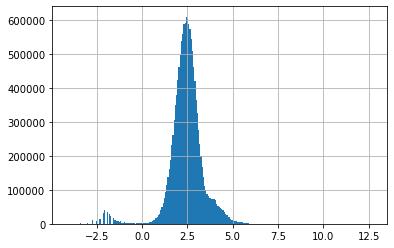

In [101]:
data_Tracks['travel_time_mins_log'].hist(bins=250)

<AxesSubplot:>

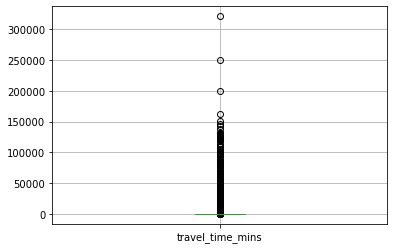

In [102]:
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 0]
df_non_extreme_travel_times.boxplot(column='travel_time_mins')

Viajes sobre 360 minutos

In [103]:
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 360]

total = df_non_extreme_travel_times['travel_time_mins'].count()
print(total)

total_prc = df_non_extreme_travel_times['travel_time_mins'].count() / data_Tracks['travel_time_mins'].count() * 100
print(total_prc)


7971
0.05731096190241046


Viajes sobre 30 minutos

In [104]:
df_non_extreme_travel_times = data_Tracks.loc[data_Tracks['travel_time_mins'] > 30]

total = df_non_extreme_travel_times['travel_time_mins'].count()
print(total)

total_prc = df_non_extreme_travel_times['travel_time_mins'].count() / data_Tracks['travel_time_mins'].count() * 100
print(total_prc)

1388050
9.979987538406828


Viajes de menos de 180 segundos

In [105]:
total = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count()
print(total)

total_proc = data_Tracks.loc[data_Tracks['travel_time'] < 180]['user_type'].count() / data_Tracks['travel_time'].count() *100
print(total_proc)

500305
3.597159803611274


Viajes con tiempo negativo

In [106]:
total = data_Tracks.loc[data_Tracks['travel_time'] < 0]['user_type'].count()
print(total)

total_proc = data_Tracks.loc[data_Tracks['travel_time'] < 0]['user_type'].count() / data_Tracks['travel_time'].count() *100
print(total_proc)

161
0.0011575793333694748


### EDA: origen vs destino

Estaciones en donde origen y destino son el mismo y el viaje es menor a 3 minutos

In [107]:
df_same_station = data_Tracks.loc[(data_Tracks['idunplug_station'] == data_Tracks['idplug_station'])]
print(df_same_station['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 10]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 60]['ANIO'].count())
print(df_same_station.loc[df_same_station['travel_time'] < 180]['ANIO'].count())



663039
151647
297477
304227


### EDA: user_type

```
user_type = 0: undetermined
user_type = 1: annual pass holder
user_type = 2: occasional user (incl. tourists, I guess)
user_type = 3: BiciMad employee
```

In [72]:
data_Tracks.groupby(['user_type'])['travel_time_mins'].describe()

,count,mean,std,min,25%,50%,75%,max
user_type,,,,,,,,
0,"105,328.0",26.523530463567955,33.77493222309412,0.03333333333333333,9.3,15.116666666666667,28.05,359.0833333333333
1,"12,622,309.0",15.50170240378853,20.865995178764166,"-16,161.55",7.7,11.4,16.733333333333334,360.0
2,"161,415.0",42.88953556567433,42.27656190986611,0.3,14.433333333333334,28.1,56.63333333333333,359.76666666666665
3,"1,012,082.0",89.99299518223734,"1,635.2763047553349",-43.78333333333333,0.26666666666666666,25.233333333333334,49.233333333333334,"321,214.81666666665"
6,"7,187.0",32.982366309540375,36.895131577179065,0.65,11.816666666666666,20.3,39.30833333333334,348.4166666666667
7,13.0,19.162820512820513,12.792020722291852,4.916666666666667,12.55,14.866666666666667,21.65,50.21666666666667


### EDA: age_range

```
ageRange = 0: undetermined
ageRange = 1: from 0 to 16 years old
ageRange = 2: from 17 to 18 years old
ageRange = 3: from 19 to 26 years old
ageRange = 4: from 27 to 40 years old
ageRange = 5: from 41 to 65 years old
ageRange = 6: older than 66
```

<AxesSubplot:xlabel='ageRange'>

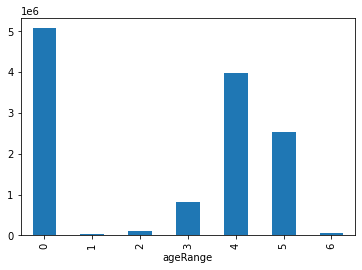

In [73]:
data_Tracks.loc[data_Tracks['user_type']==1].groupby(['ageRange'])['ANIO'].count().plot(kind='bar')



<AxesSubplot:xlabel='ageRange'>

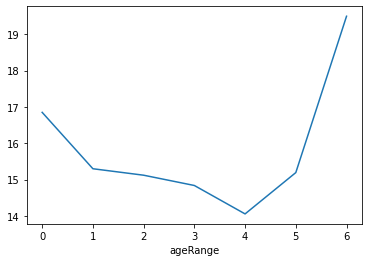

In [74]:
data_Tracks.loc[data_Tracks['user_type']==1].groupby(['ageRange'])['travel_time_mins'].mean().plot()

### EDA: Zip codes

In [75]:
data_Tracks.groupby(['zip_code'])['ANIO'].count()

zip_code
                                230
 2800                           278
 28009                            1
 2801                            11
 2809                             4
                               ... 
maxima87uk                      192
nataliamoncastillo@gmail.com      3
pin2001@icloud.com                4
sperez@nova.es                   81
ureaofs20                        16
Name: ANIO, Length: 1131, dtype: int64

### EDA: Stations

Stations de salida mas populares

In [76]:
data_Tracks['idunplug_station'].value_counts().sort_values(ascending=False)[:5]

43     179394
175    175870
57     175086
163    173879
135    169005
Name: idunplug_station, dtype: int64

Stations de llegada mas populares

In [78]:
data_Tracks['idplug_station'].value_counts().sort_values(ascending=False)[:5]

43     182355
175    177051
163    175061
57     174002
135    173892
Name: idplug_station, dtype: int64